In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import joblib

In [2]:
turku_url = 'https://raw.githubusercontent.com/Mini-project-Team-Theta/team_theta/refs/heads/main/final/turku_df.csv'
turku_df = pd.read_csv(turku_url)

In [3]:
turku_df.head()

,Observation station,Year,Month,Day,Date,Snow depth mean [cm],Average temperature [°C],cloud_code,Global radiation mean [W/m2]
0,Turku airport,2004,1,1,2004-01-01,10.0,-8.6,NaN,14.0
1,Turku airport,2004,1,2,2004-01-02,10.0,-15.2,NaN,14.2
2,Turku airport,2004,1,3,2004-01-03,10.0,-10.9,NaN,11.0
3,Turku airport,2004,1,4,2004-01-04,10.0,-2.7,NaN,5.2
4,Turku airport,2004,1,5,2004-01-05,18.0,-4.5,NaN,6.1


In [4]:
turku_df["Date"] = pd.to_datetime(turku_df["Date"])
turku_df['day_of_year'] = turku_df['Date'].dt.dayofyear
turku_df.drop(columns=["Observation station"], inplace=True)

In [5]:
turku_df["Average temperature [°C]"] = turku_df["Average temperature [°C]"].interpolate()
turku_df["Global radiation mean [W/m2]"] = turku_df["Global radiation mean [W/m2]"].interpolate()
turku_df.loc[turku_df['cloud_code'].isnull(),'cloud_code'] = 9
turku_df.loc[turku_df['Snow depth mean [cm]'].isnull(),'Snow depth mean [cm]'] = 0

In [6]:
X = turku_df[["Average temperature [°C]", "Global radiation mean [W/m2]", "day_of_year", "cloud_code"]]
y = turku_df["Snow depth mean [cm]"]

In [25]:
loaded_model = joblib.load('snow_depth_predictor.pkl')

In [26]:
predictions = loaded_model.predict(X)

In [28]:
predictions

array([29.80590416, 34.83682229, 31.4834679 , ...,  1.5088433 ,
        2.8198444 , 25.89467933], shape=(7673,))

In [ ]:
y2024 = predictions[-365::10]
x2024 = X["day_of_year"][-365::10]
y2004 = predictions[:365:10]
x2004 = X["day_of_year"][:365:10]


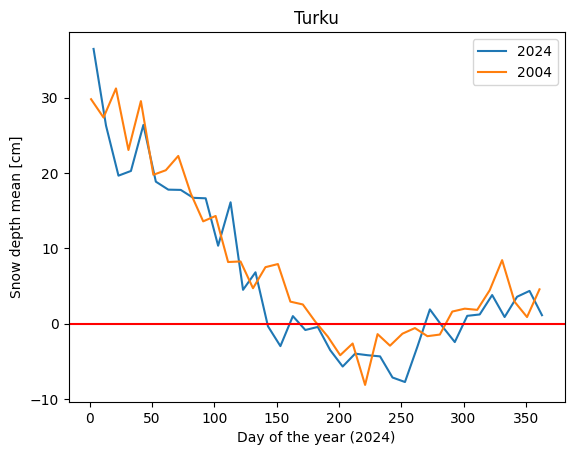

In [49]:


plt.plot(x2024, y2024, label= "2024")
plt.plot(x2004, y2004, label= "2004")
plt.title('Turku')
plt.legend()
plt.axhline(y=0, color="red")
plt.ylabel('Snow depth mean [cm]')
plt.xlabel('Day of the year (2024)')
plt.show()